# Classification Predict - Climate Change

### Table of contents

### Problem identification

In [ ]:
# background and problem statement 

### What data do we have?

In [ ]:
# description of data

### Start experiment

In [1]:
# Install necessary packages
!pip install comet_ml

In [4]:
!pip install -U spacy

Requirement already up-to-date: spacy in c:\users\georg\anaconda3\lib\site-packages (2.3.0)



In [5]:
!pip install wordcloud

  Using cached wordcloud-1.7.0-cp37-cp37m-win_amd64.whl (157 kB)


In [ ]:
# from comet_ml import Experiment

In [ ]:
# Setting the API key (saved as environment variable)
# experiment = Experiment(api_key="upOwchWrd7H1e6VEnWKW7PSvz", project_name="classification-predict", workspace="team-rm1")

### Import libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
import string

#NLP basics
# Import spaCy and load the language library for tokenisation
import spacy
#Visualisations
from spacy import displacy
# Import the toolkit and the full Porter Stemmer library
import nltk
from nltk.stem.porter import *
#Snowball Stemmer
from nltk.stem.snowball import SnowballStemmer
# Import the Matcher library
from spacy.matcher import Matcher
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher

#Parts of speech tagging
# Import the displaCy library for visualising POS
from spacy import displacy
#For adding what is not in a span to a Span (??will check it out)
from spacy.tokens import Span
#For sentence segmentation
from spacy.pipeline import SentenceSegmenter

#Text classification
#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Import SVM classifier LinearSVC
from sklearn.svm import LinearSVC
#Setting up a pipeline
from sklearn.pipeline import Pipeline
# For reporting the confusion matrix
from sklearn import metrics
#Taking a look at a review
from IPython.display import Markdown, display
#Part of bulding pipeline
from sklearn.naive_bayes import MultinomialNB

#Sematics and sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#For reporting accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Import data

In [10]:
test_df = pd.read_csv('https://raw.githubusercontent.com/Amogelang20/RM1_classification_predict/dev/test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/Amogelang20/RM1_classification_predict/dev/train.csv')

In [11]:
train_df.set_index('tweetid',inplace = True)
train_df.head()

,sentiment,message
tweetid,,
625221,1,PolySciMajor EPA chief doesn't think carbon di...
126103,1,It's not like we lack evidence of anthropogeni...
698562,2,RT @RawStory: Researchers say we have three ye...
573736,1,#TodayinMaker# WIRED : 2016 was a pivotal year...
466954,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [12]:
test_df.set_index('tweetid',inplace = True)
test_df.head()

,message
tweetid,
169760,Europe will now be looking to China to make su...
35326,Combine this with the polling of staffers re c...
224985,"The scary, unimpeachable evidence that climate..."
476263,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...


### Exploratory data analysis

In [ ]:
# look at the type of data that is present. 
# look at the types and number of columns present. 
# look at the y variable, the number of classes it has. 
# check for imbalance of data in the different classes of y variable. 
# check for missing values.
# visualise the data.

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15819 entries, 625221 to 806319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.8+ KB


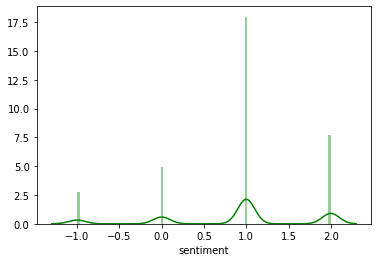

In [21]:
sns.distplot(train_df['sentiment'],
             color='g', bins=100,kde_kws={'bw':0.1}, hist_kws={'alpha': 0.4});

Text(0, 0.5, 'Number of comments')

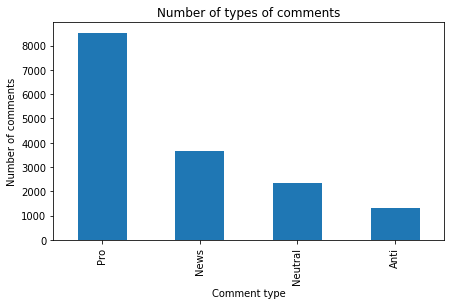

In [20]:
train_df['sentiment'].replace({-1: 'Anti',0:'Neutral',1:'Pro',2:'News'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of comments');
plt.xlabel('Comment type');
plt.ylabel('Number of comments');

In [22]:
df_Pro = train_df[train_df.sentiment==1]
df_News=train_df[train_df.sentiment==2]
df_Neutral=train_df[train_df.sentiment==0]
df_Anti=train_df[train_df.sentiment==-1]

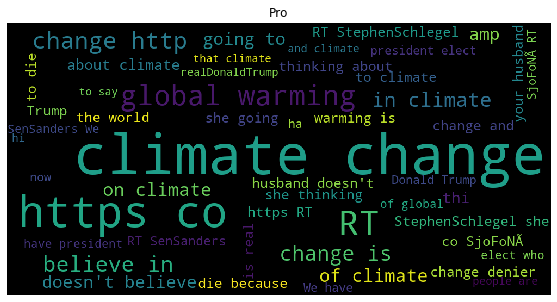

In [23]:
k= (' '.join(df_Pro['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Pro')
plt.show()


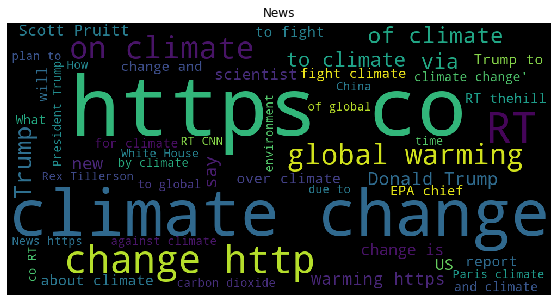

In [24]:
l= (' '.join(df_News['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(l)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('News')
plt.show()

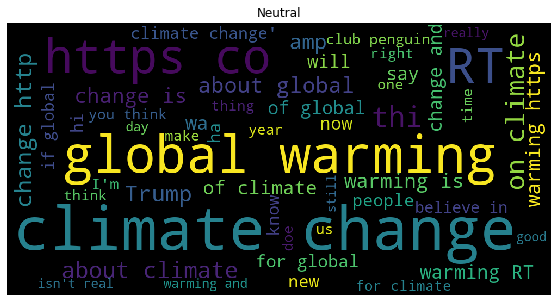

In [25]:
m= (' '.join(df_Neutral['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(m)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Neutral')
plt.show()

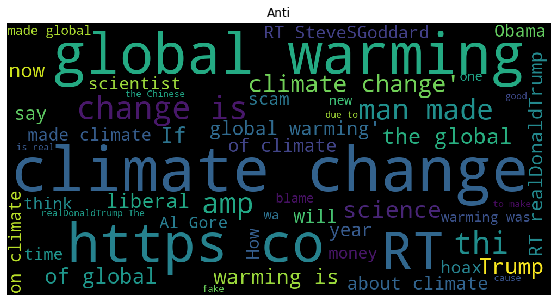

In [26]:
n= (' '.join(df_Anti['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(n)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Anti')
plt.show()

### Preprocessing

In [ ]:
#### CLEANING ####
# handle some of the unnecessary punctuation 
# upper/lower case
# change the slang words into something more meaningful to machine learning
# handle missing data and empty strings
# ect.


In [ ]:
def data_cleaning(df,column_name,punct = 'Yes',):
    #code
    df = train_df.copy()
    #drop missing texts
    df.dropna(inplace = True)

    #dropping empty tweets
    blanks = []  # start with an empty list
    for i,lb,tweet in df.itertuples():  # iterate over the DataFrame
        if type(tweet)==str:            # avoid NaN values
            if tweet.isspace():         # test 'tweet' for whitespace
                blanks.append(i)     # add matching index numbers to the list
    df.drop(blanks, inplace=True)

    #lower case all words to remove noise from Capital words. Capital words may be seen as different from lower case words
    df['message'].str.lower()

    import string
    for i in df['message']:
        re.sub(r'https\S+','',i) #removing urls
        re.sub(r'&amp;','and',i)#replace & with and
        re.sub(r'rt','retweet',i) #replace 'rt' with retweet
    #     if punct = 'Yes:'
            i.translate(str.maketrans('', '', string.punctuation)) #removing punctuations

    # remove duplicate tweets
    df = df.drop_duplicates(subset=['message'])
    df.set_index('tweetid',inplace = True)

    return df

### Feature creation

In [ ]:
# Create some features from the given tweets,e.g length of tweet. Visualise these created features


### Split data into response and predictors

In [ ]:
#### clean_message = the cleaned text data ####
y = train_df['sentiment']
X = train_df['clean_message']


### Split data into training and validation sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build pipelines to vectorize the data

In [ ]:
# Stem, tokenize and remove stopwords (all done within vectorization)
# Build a pipeline that vectorizes the text and creates classifiers for the different models 
# (logistic reg, SVM, Naive Bayes, Random Forest, Neural Nets)


In [ ]:
# Write class that has object that tokenizes text data AND stems the tokens
class StemAndTokenize:
    def __init__(self):
        self.ss = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.ss.stem(t) for t in word_tokenize(doc)]


#### Logistic Regression

In [ ]:
# Create pipeline for Logistic Regression:
lr = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('lr', LogisticRegression())
              ])


#### Naïve Bayes

In [ ]:
# Create pipeline for Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('nb', MultinomialNB())
              ])


#### Linear SVM (Support Vector Machine)

In [ ]:
# Create pipeline for SVM:
Lsvm = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('Lsvm', LinearSVC())
              ])


#### Random Forest

In [ ]:
# Create pipeline for Random Forest:
rf = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('rf', RandomForestClassifier())
              ])


#### KNN (K Nearest Neighbors)

In [ ]:
# Create pipeline for KNN:
knn = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('knn', KNeighborsClassifier())
              ])


#### Neural Networks

In [ ]:
# Create pipeline for Neural Networks:
nn = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('nn', MLPClassifier())
              ])


### Hyperparameter optimization

In [ ]:
# optimize models by tuning parameters (GridSearch)


### Train models

#### Logistic Regression

In [ ]:
# Fitting the Logistic Regression model
lr.fit(X_train, y_train)


#### Naïve Bayes

In [ ]:
# Fitting the Naïve Bayes model
nb.fit(X_train, y_train)


#### Linear SVM (Support Vector Machine)

In [ ]:
# Fitting the SVM model
Lsvm.fit(X_train, y_train)


#### Random Forest

In [ ]:
# Fitting the Random Forest model
rf.fit(X_train, y_train)


#### KNN (K Nearest Neighbors)

In [ ]:
# Fitting the KNN model
knn.fit(X_train, y_train)


#### Neural Networks

In [ ]:
# Fitting the Neural Networks model
nn.fit(X_train, y_train)


### Evaluate model accuracy

In [ ]:
# confusion matrix
# classification report


### Make predictions

In [ ]:
# make predicts 


### Save the model

In [ ]:
# pickle model


### Log parameters

In [ ]:
# save parameters in variables to be logged to comet


### End experiment

### Conclusion